 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [28]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Import the dataset
from keras.datasets import mnist

# TensorFlow and Keras
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist

# For data manipulation and preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# For visualization
import matplotlib
import matplotlib.pyplot as plt

# Set font properties for matplotlib
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1.2 Dataset examination

Using the following code, display random images,

In [30]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

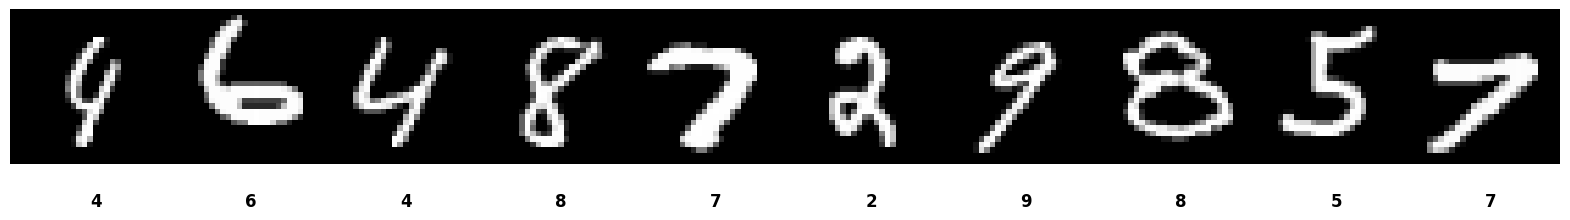

In [31]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [32]:
###################################
# Write your own code here #
# Step 1: Normalize the input variables
def normalize_data(X_train, X_test):
    # Flatten the images
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Min-max normalization
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train_flat)
    X_test_normalized = scaler.transform(X_test_flat)

    # Reshape back to the original shape
    X_train_normalized = X_train_normalized.reshape(X_train.shape)
    X_test_normalized = X_test_normalized.reshape(X_test.shape)

    return X_train_normalized, X_test_normalized

# Normalize the data
X_train_normalized, X_test_normalized = normalize_data(X_train, X_test)

# Step 2: One-hot encode the target variables
def one_hot_encode(y_train, y_test, num_classes):
    y_train_encoded = to_categorical(y_train, num_classes)
    y_test_encoded = to_categorical(y_test, num_classes)
    return y_train_encoded, y_test_encoded

# Number of classes
num_classes = 10

# One-hot encode the target variables
y_train_encoded, y_test_encoded = one_hot_encode(y_train, y_test, num_classes)

# Display the shapes of preprocessed data
print("X_train shape:", X_train_normalized.shape)
print("X_test shape:", X_test_normalized.shape)
print("y_train shape:", y_train_encoded.shape)
print("y_test shape:", y_test_encoded.shape)

###################################

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [33]:
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: Flatten the 28x28 images into 1D array
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation function
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation function
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes) and softmax activation function
])

#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [34]:
from keras.optimizers import Adam

# Define the loss function, optimizer, and metrics
loss = 'categorical_crossentropy'  # Cross-entropy loss is commonly used for multiclass classification
optimizer = Adam(learning_rate=0.001)  # Adam optimizer is often a good choice for optimization
metrics = ['accuracy']  # Accuracy is a commonly used metric for classification problems

# Compile the model
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [35]:
###################################
# Write your own code here #

# Define relevant hyperparameters
epochs = 15
batch_size = 64

# Train the model
history = model.fit(X_train_normalized, y_train_encoded,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

###################################

Epoch 1/15
750/750 [==============================] - 4s 5ms/step - loss: 0.3182 - accuracy: 0.9086 - val_loss: 0.1586 - val_accuracy: 0.9530
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.1318 - accuracy: 0.9610 - val_loss: 0.1144 - val_accuracy: 0.9663
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.9738 - val_loss: 0.0972 - val_accuracy: 0.9703
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0964 - val_accuracy: 0.9726
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0913 - val_accuracy: 0.9744
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 0.0976 - val_accuracy: 0.9703
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0895 - val_accuracy: 0.9764
Epoch 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

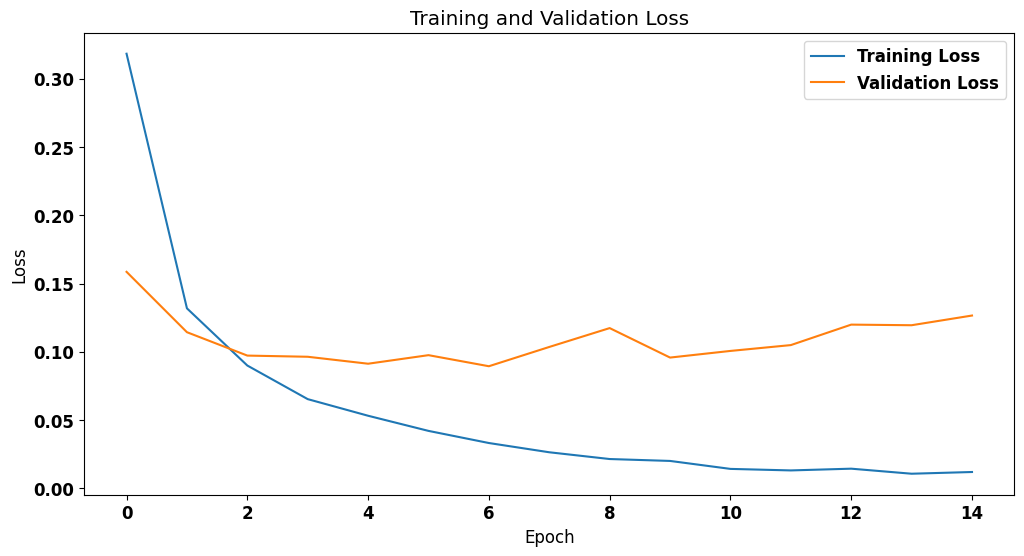

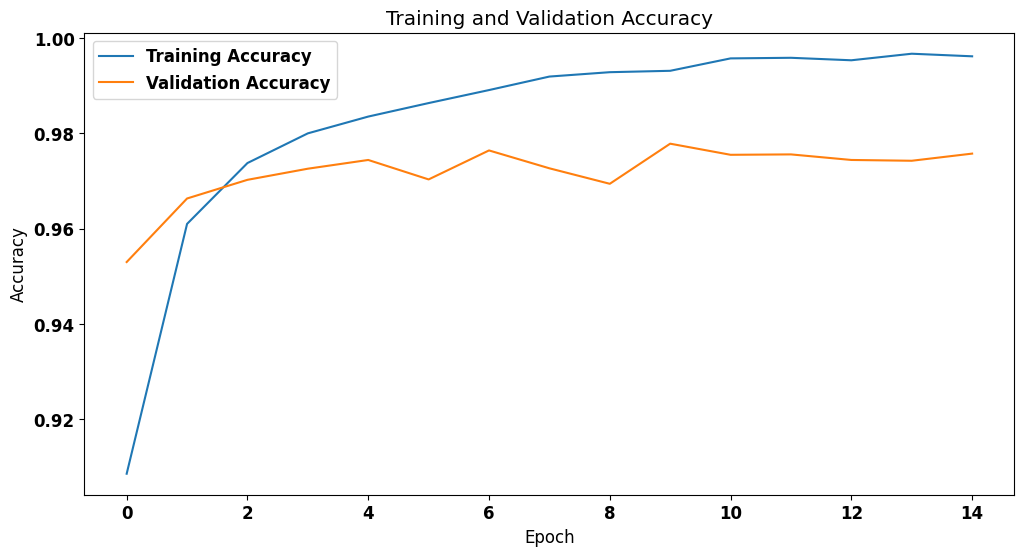

In [36]:
###################################
# Write your own code here #

# Plot the development of the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the development of the training and validation metrics (accuracy)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [37]:
###################################
# Write your own code here #

from sklearn.metrics import confusion_matrix

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict labels for the testing dataset
y_pred = model.predict(X_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

###################################

Test Loss: 0.1056
Test Accuracy: 0.9746
313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
[[ 967    1    1    0    1    1    5    1    2    1]
 [   0 1126    3    0    0    0    4    0    2    0]
 [   1    3 1010    4    5    0    0    5    4    0]
 [   1    5   10  969    0    5    1    5   10    4]
 [   1    0    2    1  965    0    3    2    1    7]
 [   2    0    0    8    3  861    4    1    8    5]
 [   0    1    0    1    7    2  946    0    1    0]
 [   1    6    8    2    4    0    0  995    5    7]
 [   4    0    2    2    9    1    3    3  946    4]
 [   2    7    2    2   25    2    1    3    4  961]]


### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

Epoch 1/20
375/375 [==============================] - 4s 5ms/step - loss: 0.6408 - accuracy: 0.8727 - val_loss: 0.3727 - val_accuracy: 0.9427
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3677 - accuracy: 0.9405 - val_loss: 0.2936 - val_accuracy: 0.9592
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3026 - accuracy: 0.9517 - val_loss: 0.2565 - val_accuracy: 0.9661
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2708 - accuracy: 0.9568 - val_loss: 0.2364 - val_accuracy: 0.9664
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2460 - accuracy: 0.9628 - val_loss: 0.2134 - val_accuracy: 0.9704
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2302 - accuracy: 0.9646 - val_loss: 0.2113 - val_accuracy: 0.9695
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2207 - accuracy: 0.9658 - val_loss: 0.1994 - val_accuracy: 0.9727
Epoch 

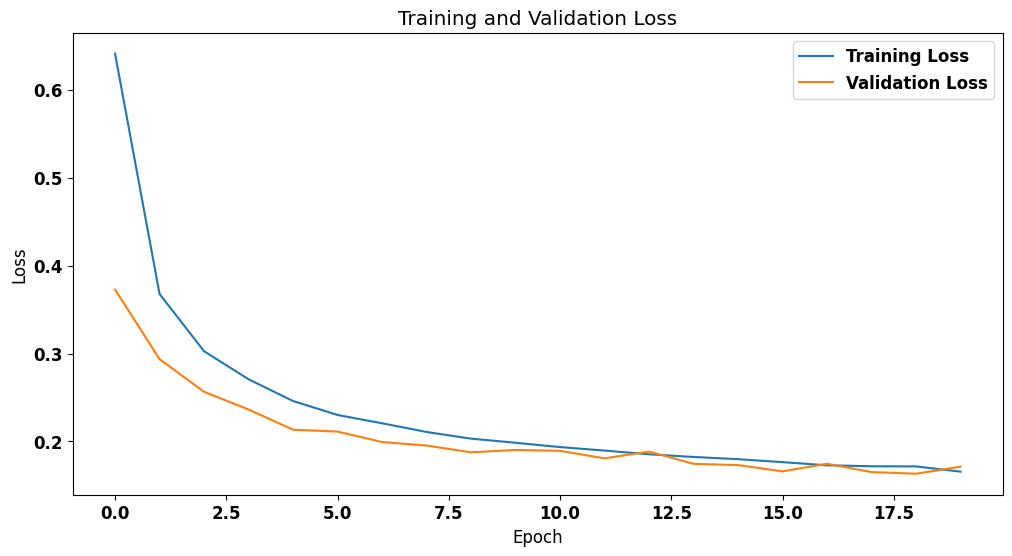

Test Loss: 0.1644
Test Accuracy: 0.9733


In [38]:
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import l1, l2

# Define the model structure with regularization techniques
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Adding L2 regularization
    Dropout(0.2),  # Adding Dropout layer with dropout rate of 0.2
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),   # Adding L2 regularization
    Dense(10, activation='softmax')
])

# Compile the model with relevant hyperparameters
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with adjusted hyperparameters
history = model.fit(X_train_normalized, y_train_encoded,
                    epochs=20,  # Increase number of epochs
                    batch_size=128,  # Adjust batch size
                    validation_split=0.2)

# Plot the development of training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")